In [99]:
import numpy as np
import apogee.tools.read as apread
from matplotlib import pyplot as plt
import pylab as pl
import pandas as pd

In [100]:
x = pd.read_csv('KC401Bin_Results_1-10EVP',delimiter=',')
print(len(x))

2992


In [101]:
KM_apoID = x['Star_Name']
KM_bin = x['1']
KM_nonbin = x['0']

In [102]:
print(KM_apoID[0])

2M00000233+1452324


In [103]:
y = pd.read_csv('/Volumes/coveydata/APOGEE_Spectra/APOGEE2_DR13/Bisector/Jessica/master_apStarList_DR13.csv',delim_whitespace=True)

In [104]:
dr13_apoID = y['VESTA']
dr13_locID = y['1']

In [105]:
K = pd.read_csv('KC_Binaries.csv',delimiter='\t')

In [106]:
KC_locID = K['Location_ID']
KC_apoID = K['Apogee_ID']
ID = K['ID']

In [121]:
print(len(KC_apoID))

1335


In [114]:
i=0
apoID_match = []
locID_match = []

for i in range(len(KM_apoID)):
    try:
        Name = KM_apoID[i]
        ind = list(KC_apoID).index(Name)
        apoID_match.append(KC_apoID[ind])
        locID_match.append(int(KC_locID[ind]))
    except ValueError:
        pass

In [120]:
import csv
j=0
with open('Matched_Binaries_KCwKM.csv','w') as csvfile:
    names = ['Location_ID','Apogee_ID']
    writer = csv.DictWriter(csvfile,delimiter=',',fieldnames=names)
    writer.writeheader()
    for j in range(len(apoID_match)):
        writer.writerow({'Location_ID':locID_match[j],'Apogee_ID':apoID_match[j]})

In [86]:
match_apoID = []
match_locID = []
    
for i in range(len(KM_apoID)):
    name = KM_apoID[i]
    indx = list(dr13_apoID).index(name)
    match_apoID.append(dr13_apoID[indx])
    match_locID.append(int(dr13_locID[indx]))

In [87]:
print(match_apoID[0])

2M00000233+1452324


## Record the mismatches 

In [159]:
total = KC_apoID.isin(KM_apoID)

In [160]:
from collections import Counter
Counter(total)

Counter({False: 513, True: 822})

In [161]:
i=0
nomatch_index = []
for i in range(len(total)):
    b = total[i]*1
    nomatch_index.append(b)

In [168]:
j = 0
nomatch_apoID = []
nomatch_locID = []
nID = []

for j in range(len(nomatch_index)):
    if nomatch_index[j] == 0:
        nomatch_apoID.append(KC_apoID[j])
        nomatch_locID.append(KC_locID[j])
        nID.append(ID[j])
print(len(nomatch_apoID))

513


In [170]:
#CSV contains the stars that were not in KM List
import csv
j=0
with open('No_Match_Binaries_KCwKM.csv','w') as csvfile:
    names = ['Location_ID','Apogee_ID','ID']
    writer = csv.DictWriter(csvfile,delimiter=',',fieldnames=names)
    writer.writeheader()
    for j in range(len(nomatch_apoID)):
        if nID[j] == 1:
                    writer.writerow({'Location_ID':nomatch_locID[j],'Apogee_ID':nomatch_apoID[j],'ID':nID[j]})


In [17]:
for j in range(len(match_apoID)):
    if KM_bin[j] >= 0.80:#0.78 and KM_bin[j] < 0.80:
        locationID = match_locID[j]
        apogeeID = match_apoID[j]
        if locationID != 1:
            header = apread.apStar(locationID, apogeeID, ext=0, header=True)
            Data = apread.apStar(locationID, apogeeID, ext=9, header=False)
            nvisits = header[1]['NVISITS']
            plt.figure(figsize=(10,10))
            

            for visit in range(0, nvisits):
                snr = header[1]['SNRVIS'+str(visit+1)]
                if (nvisits != 1):
                    CCF = Data['CCF'][0][2+ visit]
                else:
                    CCF = Data['CCF'][0]
                plt.plot(CCF + visit,label= 'Visit: '+str(1+visit) +'  and '+ 'SNR: '+ str(snr))
                plt.annotate('B: '+str(KM_bin[j])+', NB: '+str(KM_nonbin[j]), xy=(300,1.80))
                plt.xlabel('CCF Lag',fontsize=15)
                plt.ylabel('$\widehat{CCF}$ Units', fontsize=15)
                plt.title(' All Visits for '+ str(apogeeID),fontsize=16)
                pl.legend(loc='lower left')
                plt.savefig('/Users/reynaa/research2/proto_DR14/Kevin_Binary_Finder/Routine/0.80+/'
                            +'KM_Star_'+str(locationID)+'_'+str(apogeeID)+'.pdf',dpi=800)
        plt.close('all')

### Inspecting CCF Lag 325 Behaviors

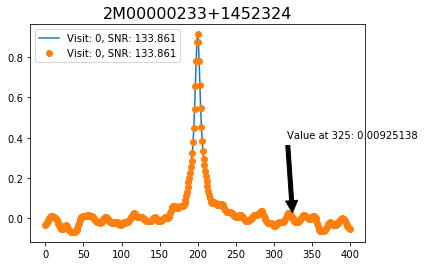

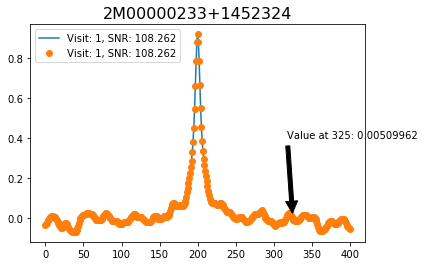

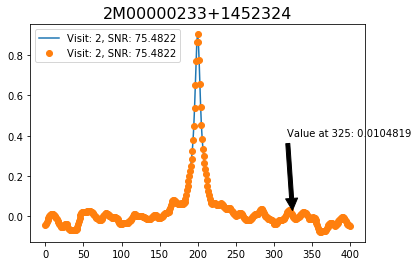

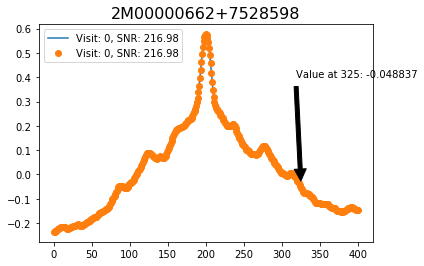

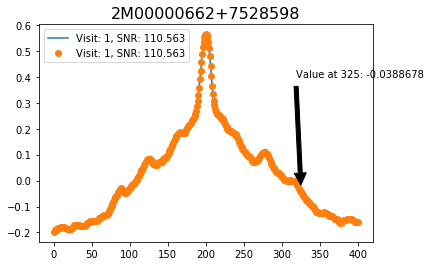

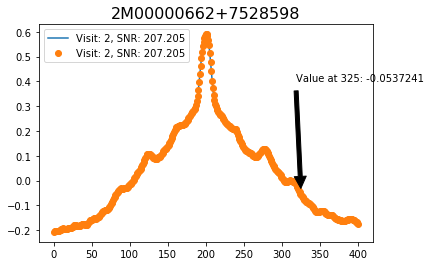

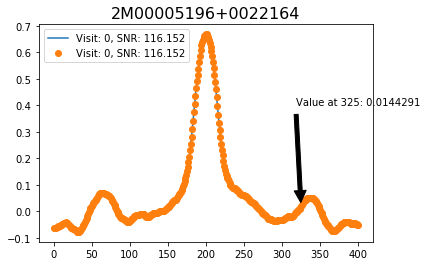

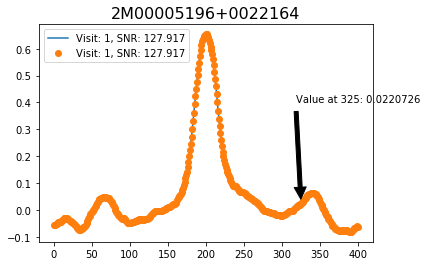

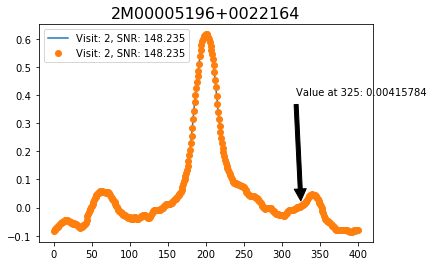

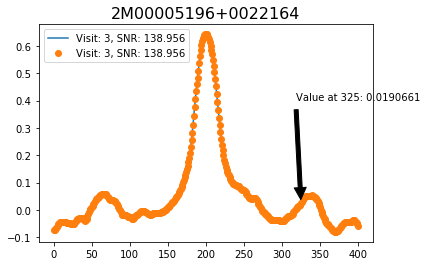

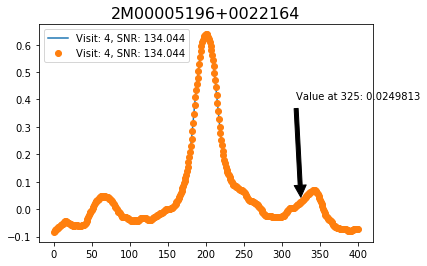

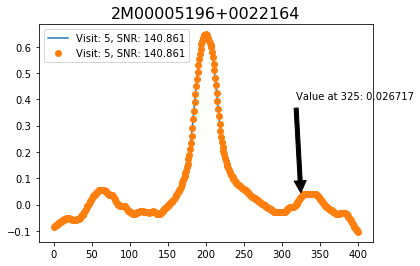

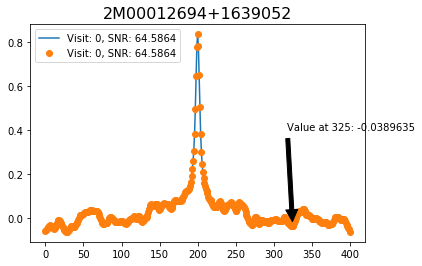

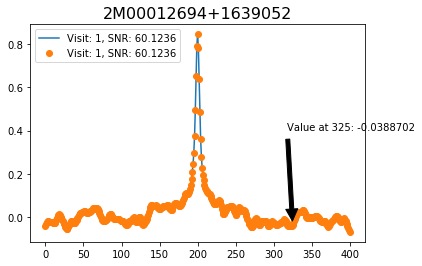

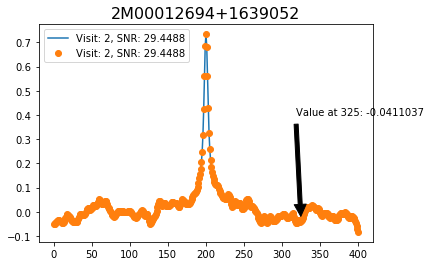

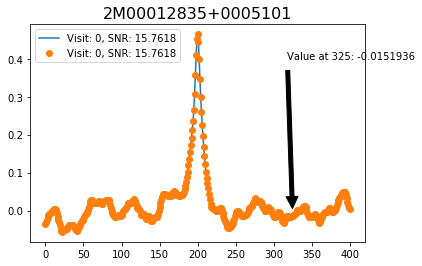

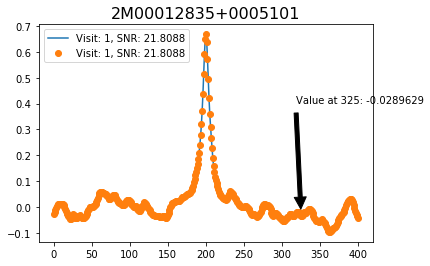

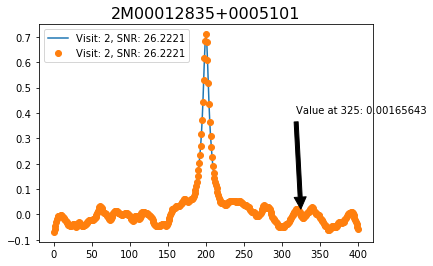

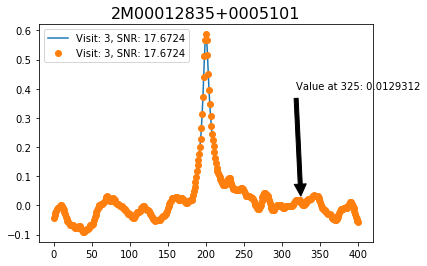

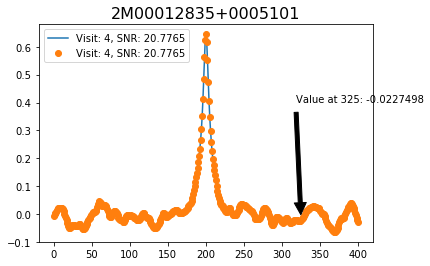

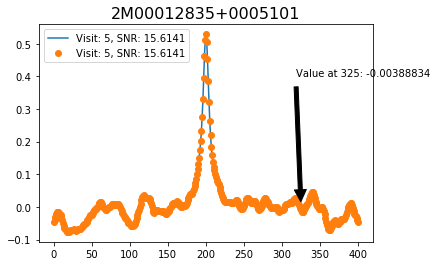

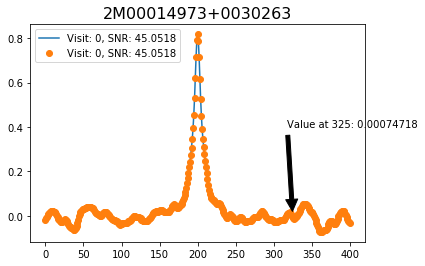

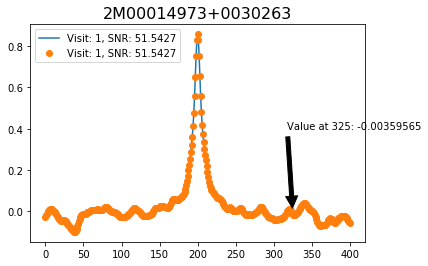

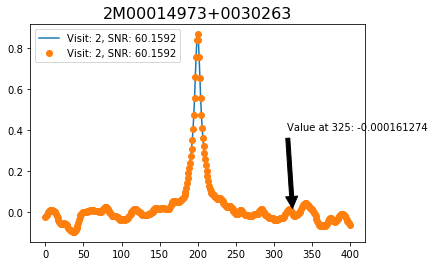

In [37]:
#for j in range(len(match_locID)):
for j in range(6):
    locationID = match_locID[j]
    apogeeID = match_apoID[j]
    if locationID != 1:
        header = apread.apStar(locationID, apogeeID, ext=0, header=True)
        Data = apread.apStar(locationID, apogeeID, ext=9, header=False)

        nvisits = header[1]['NVISITS']
        #plt.figure(figsize=(10,10))

        for visit in range(0, nvisits):
            snr = header[1]['SNRVIS'+str(visit+1)]
            if (nvisits != 1):
                CCF = Data['CCF'][0][2+ visit]
                #print(CCF[222],visit)
                #print(CCF[323],visit)
                #print(CCF[324],visit,'*')
                #print(CCF[325],visit)
                #print(CCF[226],visit)
              
            else:
                CCF = Data['CCF'][0]
            plt.plot(CCF,label= 'Visit: '+str(visit)+ ', SNR: '+str(snr))
            plt.plot(CCF,'o',label= 'Visit: '+str(visit)+ ', SNR: '+str(snr))
            plt.title(str(apogeeID),fontsize=16)
            pl.legend(loc='upper left')
            plt.annotate('Value at 325: ' + str(CCF[324]),xy=(325,CCF[324]),xytext=(318,0.4),
                         arrowprops=dict(facecolor= 'black',shrink=0.05))
            #plt.xlim(300,330)
            plt.show()

        ''' plt.plot(CCF + visit,label= 'Visit: '+str(1+visit) +'  and '+ 'SNR: '+ str(snr))
            plt.annotate('B: '+str(KM_bin[j])+', NB: '+str(KM_nonbin[j]), xy=(300,1.80))
            plt.xlabel('CCF Lag',fontsize=15)
            plt.ylabel('$\widehat{CCF}$ Units', fontsize=15)
            plt.title(' All Visits for '+ str(apogeeID),fontsize=16)
            pl.legend(loc='lower left')
            plt.savefig('KM_Star_'+str(locationID)+'_'+str(apogeeID)+'.pdf',dpi=400)
    plt.close('all')'''

In [64]:
j = 0
for j in range(len(dr13_locID)):
    locationID = dr13_locID[j]
    apogeeID = dr13_apoID[j]
    if locationID != 1:
        header = apread.apStar(locationID, apogeeID, ext=0, header=True)
        Data = apread.apStar(locationID, apogeeID, ext=9, header=False)
        nvisits = header[1]['NVISITS']

        for visit in range(0, nvisits):
            snr = header[1]['SNRVIS'+str(visit+1)]
            if (nvisits != 1):
                CCF = Data['CCF'][0][2+ visit]
            else:
                CCF = Data['CCF'][0]
            diff = abs(CCF[324] - CCF[325])
            
           # if CCF[324] > CCF[323] and CCF[324] > CCF[325]: 
            if diff >= 0.050:
                try:
                    plt.subplot(2,1,1)
                    plt.plot(CCF,label= 'Visit: '+str(visit)+ ', SNR: '+str(snr))
                    plt.title(str(apogeeID),fontsize=16)
                    plt.ylabel('CCF Units')
                    pl.legend(loc='upper left')

                    plt.subplot(2,1,2)
                    plt.plot(CCF,'.-')
                    plt.xlim(300,350)
                    plt.annotate('Value at 325: ' + str(CCF[324]),xy=(325,CCF[324]),xytext=(318,0.4),
                                 arrowprops=dict(facecolor= 'black',shrink=0.05))
                    plt.xlabel('CCF Lag')
                    plt.ylabel('CCF Units')
                    plt.savefig('/Volumes/coveydata/APOGEE_Spectra/APOGEE2_DR13/Bisector/Jessica/KM_Plots/Suspects/'+str(locationID)+'_'+str(apogeeID)+'.pdf',dpi=500)
                    plt.close('all')
                except OSError:
                    print('skipped star! ', str(locationID),str(apogeeID))
                    pass
            #plt.show()
         

OSError: File apStar-r6-2M12382107-0720490.fits does not appear to exist on the server (as http://data.sdss.org/sas/dr13/apogee/spectro/redux/r6/stars/apo25m/4126/apStar-r6-2M12382107-0720490.fits) ...